# Fundamentals of Machine Learning - Exercise 1b
### Deadline: 27.11.2020, 16:00

- Johannes Kammerer, Zhao Sun, Tong Yu


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn import model_selection
from sklearn.neighbors import KNeighborsClassifier

## 3 Nearest Neighbor Classification
### 3.1 Exploring the Data (3 points)

dict_keys(['data', 'target', 'target_names', 'images', 'DESCR'])
data.dype= float64
data.shape= (1797, 64)
COMMENTS: Size of these images is 8x8


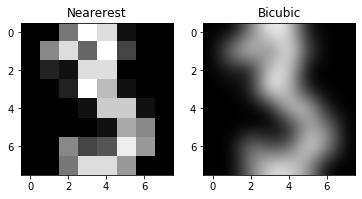

In [2]:
# Load the dataset from sklearn and extract the data:

digits = load_digits()
print(digits.keys())

data = digits["data"]
images = digits["images"]
target = digits["target"]
target_names = digits["target_names"]
print('data.dype=',data.dtype)
print('data.shape=',data.shape)
m = int(data.shape[1]**0.5)
print('COMMENTS: Size of these images is {}x{}'.format(m,m))

img = data[3].reshape(m,m)
assert 2 == len(img.shape)
plt.figure()
plt.gray()

plt.subplot(1,2,1)
plt.imshow(img, interpolation ="nearest") # also try interpolation =" bicubic "
plt.title('Nearerest')

plt.subplot(1,2,2)
plt.imshow(img, interpolation ="bicubic") # also try interpolation =" bicubic "
plt.title('Bicubic')

plt.show()

In [3]:
# Moreover, sklearn provides a convenient function to separate the data into a training and a test set.
X_all = data
y_all = target
X_train, X_test, y_train, y_test = model_selection.train_test_split(digits.data, digits.target, test_size = 0.4, random_state = 0)

# print(np.all(X_all == digits.data),np.all(y_all == digits.target))
print('training set size = {}, test set size = {}'.format(X_train.shape[0],X_test.shape[0]))


training set size = 1078, test set size = 719


<span style ="color: green; font-weight: bold;  "> COMMENTS: Same as the solution provided. </span>

### 3.2 Distance function computation using loops (3 points)

In [4]:
# Naive implementation of the nearest neighbor classifier using loops

def dist_loop(training, test):
    """
    Computes the Euclidean distance between all instances in the training and test set (in the feature space). 
    Parameters:
    ---------------------------------------
    training: matrix of size N × D
    test: matrix of size M × D 
    where D: pixels per image, N: size of training set, M: size of test set
    
    Return:
    ---------------------------------------
    A distance matrix of size N x M
    """
    # numpy.square(), numpy.sum() and numpy.sqrt() or numpy.linalg.norm()

    N,D = training.shape
    M = test.shape[0]
    dist = np.zeros([N,M])
    
    for i in range(N):
        for j in range(M):
            # dist[i,j] = np.sqrt(np.square(training[i] - test[j]).sum())  # alternatively
            sum = 0
            for k in range(D):
                sum += (training[i,k] - test[j,k])**2
            dist[i,j] = sum ** 0.5
    
    return dist


In [12]:
# def dist_vec_old(training, test):
#     N = training.shape[0]
#     M = test.shape[0]
    
#     dist = np.zeros([N,M])
#     for i in range(N):
#         dist[i] = np.linalg.norm(training[i] - test, axis = 1) #Euclidean distance is the l2 norm
#     return dist  

#a= np.array([[1,0],[0,1],[1,1],[0,0]])
#b = np.array([[0,1,1],[1,0,0]])
#print(dist_vec(a,b.T))
#print(np.all(dist_loop(a,b.T) == dist_vec_old(a,b.T)))
#print(np.all(dist_vec(a,b.T) == dist_vec_old(a,b.T)))


<span style ="color: green; font-weight: bold;  "> COMMENTS: Slightly different from the suggested solution; we have actually implemented a function with 3 loops that did not use any numpy methods at all to demonstrate a more prominant difference in terms of execution speed. </span>

### 3.3 Distance function computation using vectorization (8 points)

#### Compute distance between two matrixes
Suppose Training set P : { $N \times D$ }. Test set C : { $M \times D$ }.<br/>   

And tranining set: $P_i =[P_{i1}P_{i2}...P_{iD}]$, test set: $C_i =[C_{j1}C_{j2}... C_{jD}]$


First, compute the distance  $dist(i,j)$ between $P_{i}$ and $C_{j}$:
$$d(P_i,C_j) = \sqrt{(P_{i1}-C_{j1})^2 +(P_{i2}-C_{j2})^2+...+(P_{iD}-C_{jD})^2}$$  
$$=\sqrt{(P_{i1}^2+ P_{i2}^2 +...+ P_{iD}^2) + (C_{j1}^2 + C_{j2}^2+...+ C_{jD}^2) - 2\times(P_{i1}C_{j1} +P_{i2}C_{j2}+...P_{iD}C_{jD})}$$  
$$=\sqrt{||P_i||_2+||C_j||_2 - 2\times P_iC_j^T}$$

Then, compute the distance  $dist(i)$ between $P_{i}$ and matrix C:

$$d(P_i) = \sqrt{(||P_i||_2 ||P_i||_2 ... ||P_i||_2) + (||C_1||_2  ||C_2||_2 ... ||C_N||_2) - 2\times P_iC^T}$$

Finally, compute the distance dist between P and C:

$$dist = \sqrt{\begin{bmatrix}
||P_1||_2&||P_1||_2&\cdots&||P_1||_2\\
||P_2||_2&||P_2||_2&\cdots&||P_2||_2\\
\vdots&\vdots&\ddots&\vdots\\
||P_M||_2&||P_M||_2&\cdots&||P_M||_2
\end{bmatrix} + 
\begin{bmatrix}
||C_1||_2&||C_2||_2&\cdots&||C_N||_2\\
||C_1||_2&||C_2||_2&\cdots&||C_N||_2\\
\vdots&\vdots&\ddots&\vdots\\
||C_1||_2&||C_2||_2&\cdots&||C_N||_2
\end{bmatrix} - 2 \times PC^T}$$




In [10]:
def dist_vec(training, test):
    """
    Computes the Euclidean distance between all instances in the training and test set (in the feature space). 
    Parameters:
    ---------------------------------------
    training: matrix of size N × D
    test: matrix of size M × D 
    where D: pixels per image, N: size of training set, M: size of test set
    
    Return:
    ---------------------------------------
    A distance matrix of size N x M
    """

    N = training.shape[0]
    M = test.shape[0]
    dist = np.zeros([N,M])
    dist = np.sqrt(-2* np.dot(training, test.T)+ np.sum(np.square(test), axis =1) + np.transpose([np.sum(np.square(training), axis = 1)]))
    
    return dist

In [11]:
#a= np.array([[1,0],[0,1],[1,1],[0,0]])
#b = np.array([[0,1,1],[1,0,0]])
#print(dist_vec(a,b.T))
#print(np.all(dist_loop(a,b.T) == dist_vec(a,b.T)))

# print(np.all(dist_loop(X_train, X_test) == dist_vec(X_train, X_test)))

print("For the naive dist_loop function: ")
%timeit dist_loop(X_train, X_test)

print("\nFor the vectorized dist_vec function: ")
%timeit dist_vec(X_train, X_test)

For the naive dist_loop function: 
38.9 s ± 262 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)

For the vectorized dist_vec function: 
17.1 ms ± 252 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


<span style ="color: green; font-weight: bold"> COMMENTS: Same approach as the alternative solution provided. However, we really like the suggested approach using broadcasting. We also like the helper function to test if the two methods return the same results or close enough. Furthermore, we noticed another really smart and elegent implementation from our peer-validation group: >>> np.linalg.norm((training[:,None,:] - test[None,:,:]), axis=2). </span>

### 3.4 Implement the k-nearest neighbor classifier (6 points)

In [13]:
def knn_classifier(k, X_train, y_train, X_test):
    """
    K-nearest neighbour classifier for arbitrary training set size.
    
    params
    ------------------------------------------------
    k: int, number of neighbours to be included in the majority vote
    
    X_train: np.array of size N x D consisting of N training data points each with D features 
    y_train: np.array of size N x 1 consisting of N labels for training data    
    X_test: np.array of size M x D consisting of M test data points each with D features
    
    returns
    -------------------------------------------------
    y_predict: np.array of size M x 1 consisting of predicted class labels for X_test samples
    
    """
    N = X_train.shape[0]
    M = X_test.shape[0]
    y_predict = np.zeros(M)
    
    dist = dist_vec(X_train, X_test) # matrix of N x M
    
    k_indices = dist.argsort(axis = 0)[:k] # choose the top k rows 
    
    for i in range(M):
        # for each test point i
        k_labels = y_train[k_indices[:,i]] 
        # print(i, k_labels)
        labels, counts = np.unique(k_labels,return_counts=True)
        idx = np.argmax(counts)
        y_predict[i] = labels[idx]
    
    return y_predict

# Test
#k = 3
#X_train = np.array([[10,0],[11,0],[12,0],[13,0],[20,1],[21,1],[22,1],[23,1],[24,1]])
#y_train = np.array([0,0,0,0,1,1,1,1,1])
#X_test = np.array([[15,2]])
#knn_classifier(k, X_train, y_train, X_test)

<span style ="color: green; font-weight: bold"> COMMENTS: Essentially the same as the suggested solution, except we make use of np.unique() to count the number of occurances for each class in the k neighbours
</span>

error rates:  [0.0139, 0.0069, 0.0069, 0.0, 0.0069, 0.0, 0.0, 0.0069, 0.0069, 0.0208, 0.0208, 0.0278, 0.0208, 0.0208, 0.0208, 0.0208, 0.0208]
Describe the dependency of the classification performance on k. 
COMMENTS: For small values of k, the error rate decreases with increasing k initially, but for large k values (i.e. k > 15), the error rate increases. the optimal k value is probably between 7 and 13.


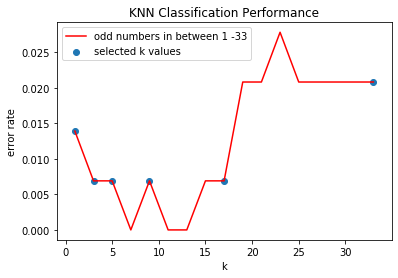

In [14]:
# Filter out digits 3 and 9 from data set:

y_train_39 = np.hstack((y_train[y_train == 3],y_train[y_train == 9]))
X_train_39 = np.vstack((X_train[y_train == 3],X_train[y_train == 9]))

y_test_39 = np.hstack((y_test[y_test == 3],y_test[y_test == 9]))
X_test_39 = np.vstack((X_test[y_test == 3],X_test[y_test == 9]))

#print(y_train.shape, (y_train[y_train == 3]).shape,(y_train[y_train == 9]).shape)
#print(y_train_39.shape, y_train_39)
#print(X_train.shape, (X_train[y_train == 3]).shape,(X_train[y_train == 9]).shape)
#print(X_train_39.shape)

#print(y_test.shape, (y_test[y_test == 3]).shape,(y_test[y_test == 9]).shape)
#print(y_test_39.shape, y_test_39)
#print(X_test.shape, (X_test[y_test == 3]).shape,(X_test[y_test == 9]).shape)
#print(X_test_39.shape)

k_values = np.arange(1, 35, 2).tolist()
errors_39 = []
for k in k_values:
    y_predict_39 = knn_classifier(k, X_train_39, y_train_39, X_test_39)
    err = (y_predict_39 != y_test_39).sum() / y_test_39.shape[0]
    errors_39.append(round(err,4))

k_dots = [1, 3, 5, 9, 17, 33]
indx = [k_values.index(i) for i in k_dots]
errors_dots = np.array(errors_39)[indx]
    
print("error rates: ", errors_39)
plt.plot(k_values, errors_39,c='red',label="odd numbers in between 1 -33")
plt.scatter(k_dots, errors_dots,marker='o',label="selected k values")

plt.title('KNN Classification Performance')
plt.xlabel("k")
plt.ylabel('error rate')
plt.legend()

print("Describe the dependency of the classification performance on k.",
      "\nCOMMENTS: For small values of k, the error rate decreases with increasing k initially, but for large k values (i.e. k > 15), the error rate increases.",
      "the optimal k value is probably between 7 and 13.")


<span style ="color: green; font-weight: bold"> COMMENTS: 
    <br> * We notice the X_train[np.logical_or(classA==y_train, classB==y_train)] is a better implementation than our np.stack(). 
    <br> * We also notice that np.count_nonzero(A==B) is an alternative way of expressing (A != B).sum()
    <br> * In addition, we like the idea of presenting the confusion matrix in the suggested solution and will try to incorporate that in future solutions.
</span>

## 4 Cross-validation (8 points)

In [15]:
def split_folds(data,target,L):
    """
    To randomly split the given data and labels into L folds of roughly equal size
    
    """
    N = data.shape[0]
    idx = np.random.permutation(N)
    X_folds = np.array_split(data[idx],L)
    y_folds = np.array_split(target[idx],L)

    return X_folds, y_folds

#L = 10
#X_folds, y_folds = split_folds(data, target, L)

In [16]:
data_39 = np.vstack((X_train_39,X_test_39))
target_39 = np.hstack((y_train_39,y_test_39))

L_values = [2,5,10]
k_values = [1,5,9,13]

sklearn_L = []
knn_L = []

for L in L_values:
    X_folds, y_folds = split_folds(data_39, target_39, L)
    
    sklearn_k = []
    knn_k = []

    for k in k_values:
        skmodel = KNeighborsClassifier(n_neighbors=k)
        
        errors_sk = []
        errors_knn = []
        
        for i in range(L):
            X_test = X_folds[i]
            y_test = y_folds[i]
            
            X_ = [X_folds[j] for j in range(L) if j!=i]
            X_train = np.vstack(X_)

            y_ = [y_folds[j] for j in range(L) if j!=i]
            y_train = np.hstack(y_)
            
            skmodel.fit(X_train,y_train)
            y_skmodel = skmodel.predict(X_test)
            err_sk = (y_skmodel != y_test).sum() / y_test.shape[0]
            errors_sk.append(err_sk)
            
            y_knn = knn_classifier(k, X_train, y_train, X_test)
            err_knn = (y_knn != y_test).sum() / y_test.shape[0]
            errors_knn.append(err_knn)
        
        sklearn_k.append([np.array(errors_sk).mean(),np.array(errors_sk).std()])
        knn_k.append([np.array(errors_knn).mean(),np.array(errors_knn).std()])
        
    sklearn_L.append(sklearn_k)
    knn_L.append(knn_k)

results = np.array([sklearn_L,knn_L])
results.shape


(2, 3, 4, 2)

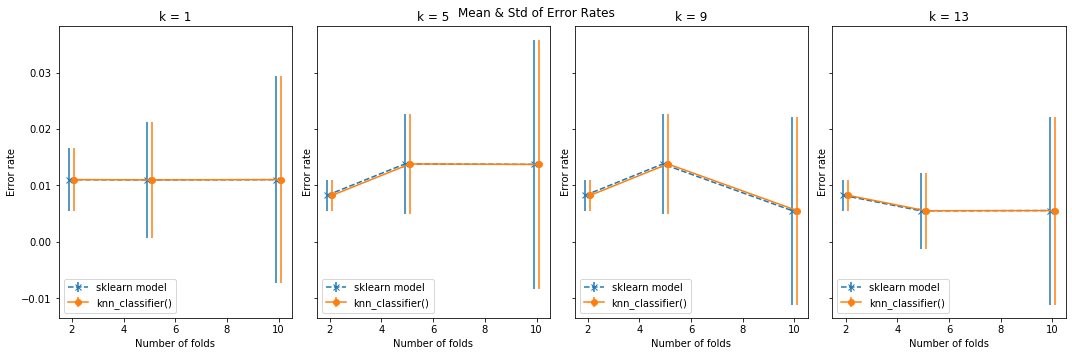

In [17]:
fig, ax = plt.subplots(1, len(k_values), figsize = (15, 5), tight_layout = True, sharey = True, sharex=True)
fig.suptitle("Mean & Std of Error Rates")
for i in range(len(k_values)):
    ax[i].set_title('k = %i' %k_values[i])
    ax[i].set_xlabel("Number of folds")
    ax[i].set_ylabel("Error rate")
    ax[i].errorbar(np.array(L_values)-0.1, results[0,:,i,0], yerr = results[0,:,i,1], fmt = 'x--', label = 'sklearn model')
    ax[i].errorbar(np.array(L_values)+0.1, results[1,:,i,0], yerr = results[1,:,i,1], fmt = 'o-', label = 'knn_classifier()')
    ax[i].legend(loc='lower left')
fig.tight_layout()

In [18]:
print("COMMENTS: As L increases, the mean error rate stablises but the standard deviation increases.")

COMMENTS: As L increases, the mean error rate stablises but the standard deviation increases.


<span style ="color: green; font-weight: bold"> COMMENTS: Correct observation and more or less in line with the provided solution.
</span>